# Introduction to Scikit-Learn

An excelent introduction to Scikit-Learn can be found the book "Python Data Science Handbook" by Jake VanderPlas, which can be found online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html). This notebook is partially based on that book.

You must have a Scikit-Learn v. > 0.18.

## Data preparation

Scikit-Learn expects data in form of NumPy array or Pandas Dataframe. Depending on the ML task, Scikit-Learn will expect two arrays:

* Features matrix: Bidimensional matrix containing. By convenion, it is stored in a variable with prefix **X**.
* Target matrix: Target values needed in supervised learning. By convenion, it is stored in a variable with prefix **y**.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png" alt="">

## Scikit-Learn API

Despite the huge amount of algorithms implemented in Scikit-Learn, it exposes a common behaviour to the programming, making this library quite easy to use. Once this common pattern is understood, learning new algorithms is straitforward.

As VanderPlas explains in his book:

1. **Choose a class of model** by importing the appropriate estimator class from Scikit-Learn.
2. **Choose model hyperparameters** by instantiating this class with desired values.
3. Arrange data into a **features matrix and target vector** following the discussion above.
4. **Fit the model** to your data by calling the `fit()` method of the model instance.
5. Apply the Model to **new data**:
    - For supervised learning, often we predict labels for unknown data using the `predict()` method.
    - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or predict() method.
    
An hyperparameter is, by definition, a parameter associated to a learning algorithms. For instance, the k-nn algorithm has only one parameter, k.

## Linear regression example

### Data preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### Choose a class model

In [2]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters

For instance, in a linear regression we must decide whether we want or not to fit the intercept.

In [3]:
model = LinearRegression(fit_intercept=True)

### Arrange data into a features matrix and target vector

In [4]:
X = x[:, np.newaxis] # Add new dimension
print(x.shape)
print(X.shape)

(50,)
(50, 1)


### Fit the model to your data

In [5]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

By convention, all the internal model parameters learnt during the trainning are stored in variables with trailing underscores:

In [6]:
print(model.coef_)
print(model.intercept_)

[1.9776566]
-0.9033107255311164


### Predict labels for unknown data¶

In [7]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

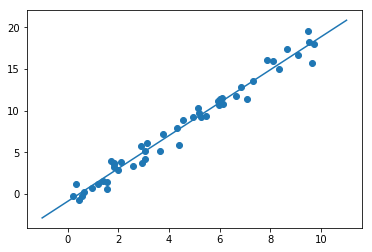

In [8]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

The code yields as follows.

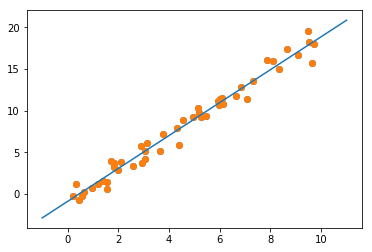

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data preparation
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

# Hyperparameter selection
model = LinearRegression(fit_intercept=True)

# Data arragement
X = x[:, np.newaxis]

# Model fit
model.fit(X, y)

# Model evaluation
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning: Iris species prediction with a K-nearest neighbors classifier

Predict the species feature in the Iris dataset, split training and validation sets.

In first place we load the dataset.

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Arrange data.

In [11]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Split train and validation sets.

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris)

By default train_test_split takes 25% of samples for testing. Therefore, we have the following variables:

- Xtrain: Train data
- Xtest: Test data
- ytrain: Train target
- ytest: Test target

Create the model and fit it.

In [13]:
from sklearn.neighbors import KNeighborsClassifier # 1.- Select model

model = KNeighborsClassifier(n_neighbors=1) # 2.- Instanciate model
model.fit(Xtrain, ytrain)                   # 3.- Fit model
y_model = model.predict(Xtest)              # 4.- Predict on new data

Compute the accuracy of the model to assess its quality

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9473684210526315

Several times it is interesting to get a better undertanding on the model performance or the influence of the hyperparameter settings. Let's run an experiment to assess how different values of K could influence the model accuracy.

Text(0, 0.5, 'Accuracy')

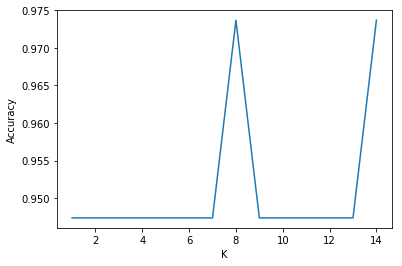

In [15]:
scores = []
neighbors = np.arange(1,15)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model))

plt.plot(neighbors, scores)
plt.xlabel("K")
plt.ylabel("Accuracy")

## Unsupervised learning: Dimensionality reduction with PCA

In [16]:
from sklearn.decomposition import PCA  # 1. Choose the model class

model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Let's plot the result.

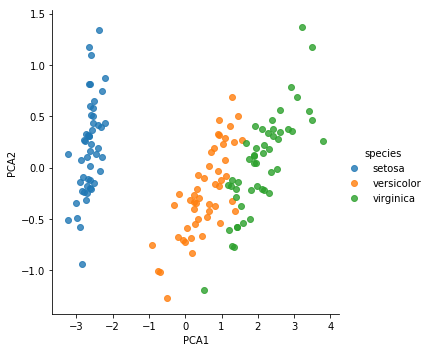

In [17]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We reduced the dataset dimensionality from four attributes to just two, but the classes are still clearly separable.

What happens if we classify the species with different number of dimensions?

## Classification of principal components

Text(0, 0.5, 'Accuracy')

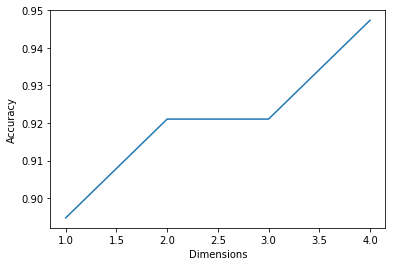

In [18]:
scores = []
dimensions = np.arange(1, 5)
model = None

for k in dimensions:
    model = PCA(n_components=k) 
    model.fit(X_iris)
    X_pca = model.transform(Xtrain) 
    
    predictor = KNeighborsClassifier(n_neighbors=1)
    predictor.fit(X_pca, ytrain)
    y_model = predictor.predict(model.transform(Xtest))
    scores.append(accuracy_score(ytest, y_model))
    
plt.plot(dimensions, scores)
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")